In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/adarcher/Downloads/rastermap-master/rastermap-master/rastermap'
os.chdir(path)
print('Directory:')
print(os.getcwd())
from mapping import Rastermap
from rastermap import Rastermap

model = Rastermap(n_components=1, n_X=30, n_Y=30,nPC=200, init='pca')

sp = np.load('C:/Users/adarcher/Desktop/suite2p/plane0/spks.npy')

# zcoring spikes 
sp = zscore(sp, axis=1)

print('File shape:')
print(sp.shape)
model.fit(sp)

ax = plt.axes([1, 1, 1, 1])
ax.imshow(sp[model.isort1, :], interpolation='none')
#plt.imshow(sp[model.isort1, :])

# fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

# embedding : array-like, shape (n_samples, n_components) Stores the embedding vectors.
# u,sv,v : singular value decomposition of data S, potentially with smoothing
# isort1 : sorting along first dimension (n_samples) of matrix
# isort2 : sorting along second dimension (n_features) of matrix (if n_Y > 0)
# cmap : correlation of each item with all locations in the embedding map (before upsampling)
# A : PC coefficients of each Fourier mode

In [55]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm
from scipy.stats import zscore

### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

In [56]:
#rint(model.embedding[:,0])
#rint(sp[isort,:])

[[ 0.2804878  -0.25700805  0.05318605 ...  0.18636723 -0.25543612
   0.4505042 ]
 [ 0.22791262 -0.25621912  0.0991224  ...  0.20976754 -0.25316367
   0.37851158]
 [ 0.13750368 -0.25473407  0.17638654 ...  0.24843843 -0.24788153
   0.25558165]
 ...
 [-0.27076593 -0.26668337 -0.2435799  ... -0.15244487  0.08918112
   0.270106  ]
 [-0.27350587 -0.2721194  -0.25859165 ... -0.19562624 -0.00735051
   0.31038746]
 [-0.2749875  -0.27445543 -0.26568177 ... -0.21865407 -0.06229061
   0.32863697]]


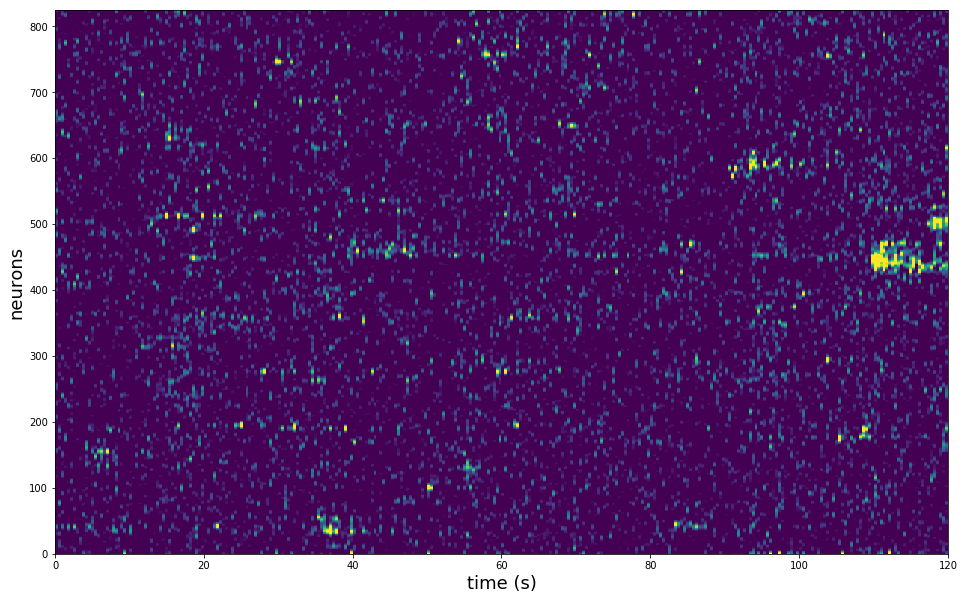

In [57]:
### from MouseLand, run_rastermap.ipynb
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
print(splot)

plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

[[-1.5301034e-01  3.3353382e-01 -2.4273181e-01 ... -2.5713199e-01
  -2.5529146e-01 -1.0305218e-01]
 [-1.2165695e-01  3.3163726e-01 -2.3607416e-01 ... -2.5666401e-01
  -2.5243253e-01 -1.1494853e-01]
 [-5.4692809e-02  3.3233395e-01 -2.2219576e-01 ... -2.5616273e-01
  -2.4551712e-01 -1.3645257e-01]
 ...
 [ 2.1433463e+00 -1.1918895e-02 -2.6010138e-01 ... -1.5809871e-01
  -2.4787182e-01 -2.3988064e-01]
 [ 1.4168051e+00 -2.8123574e-03 -2.6427445e-01 ... -1.9426179e-01
  -2.6291886e-01 -2.5311831e-01]
 [ 1.0361073e+00  3.6503468e-04 -2.6673388e-01 ... -2.1324271e-01
  -2.6932037e-01 -2.6021442e-01]]


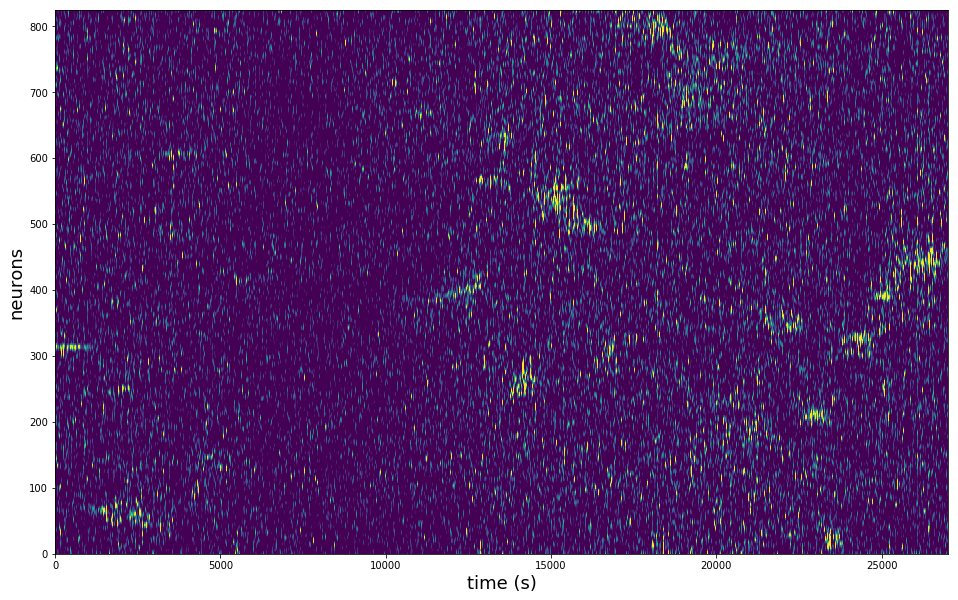

In [58]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,model.isort2]
print(splot)


plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()